# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adam Javier
- **Email:** adamjavier26@student.ub.ac.id
- **ID Dicoding:** mc006d5y1291

## Menentukan Pertanyaan Bisnis

- Pada jam berapa tren penyewaan sepeda mencapai puncaknya dalam sehari?
- Bagaimana tren jumlah penyewaan sepeda dari dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data
Pada tahap ini, kita mengimpor dataset yang berisi informasi penyewaan sepeda dari file **day.csv** dan **hour.csv**.


In [2]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv berisi data agregat penyewaan sepeda per hari.
-hour.csv berisi data penyewaan sepeda per jam.
-Kedua dataset ini memiliki informasi seperti tanggal, jumlah sepeda yang disewa, serta faktor cuaca yang dapat mempengaruhi jumlah penyewaan.
-data telah di gather

### Assessing Data
Pada tahap ini, kita akan melakukan pemeriksaan awal terhadap dataset untuk memahami struktur data, tipe data, kemungkinan data yang hilang (missing values), serta potensi duplikasi data.

**ASSESSING DATA TABEL DAY**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000




---
- ditemukan data dteday tidak sesuai datetime malah menggunakan object
- tidak ditemukan missing values pada dataset
- tidak ada data yang terduplikasi.
-Dari hasil describe(), kita dapat melihat rentang nilai pada tiap kolom, yang membantu dalam memahami distribusi data serta mendeteksi kemungkinan anomali.

**ASSESSING DATA TABEL HOUR**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



---
- ditemukan data dteday tidak sesuai datetime malah menggunakan object
- tidak ditemukan missing values pada dataset
- tidak ada data yang terduplikasi.
-Dari hasil describe(), kita dapat melihat rentang nilai pada tiap kolom, yang membantu dalam memahami distribusi data serta mendeteksi kemungkinan anomali.

### Cleaning Data

Pada tahap ini, kita melakukan pembersihan data dengan mengonversi kolom tanggal (`dteday`) menjadi format **datetime** agar lebih mudah digunakan dalam analisis waktu.

In [12]:
dateime_columns = ["dteday"]
for column in dateime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Format Data yang Lebih Akurat: Kolom dteday yang sebelumnya berupa object (string) kini dikonversi menjadi datetime, sehingga memudahkan analisis berbasis waktu seperti tren musiman atau perbandingan antar periode.

- Konsistensi dalam Pengolahan Data: Dengan tipe data datetime, kita dapat melakukan operasi berbasis tanggal seperti resampling, grouping berdasarkan hari/bulan/tahun, atau ekstraksi fitur waktu (misalnya hari dalam seminggu, bulan, atau tahun).

- Kesiapan Data untuk Analisis Lanjutan: Setelah pembersihan ini, dataset siap digunakan untuk eksplorasi lebih lanjut, termasuk visualisasi dan pemodelan tren.

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita melakukan eksplorasi awal terhadap dataset untuk memahami distribusi data, karakteristik setiap kolom, serta mencari pola yang dapat digunakan dalam analisis lebih lanjut.

### Explore ...

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [17]:
summary = pd.DataFrame({
    "Total Casual": [day_df["casual"].sum()],
    "Total Registered": [day_df["registered"].sum()],
    "Total Count": [day_df["cnt"].sum()]
})

print(summary)

   Total Casual  Total Registered  Total Count
0        620017           2672662      3292679


In [18]:
day_df.groupby("season").agg({
    "cnt": ["mean", "max", "min"],
    "casual": ["mean", "max", "min"],
    "registered": ["mean", "max", "min"]


})

cnt                   casual              registered        \
               mean   max   min         mean   max  min         mean   max   
season                                                                       
1       2604.132597  7836   431   334.928177  3155    9  2269.204420  5315   
2       4992.331522  8362   795  1106.097826  3410  120  3886.233696  6456   
3       5644.303191  8714  1115  1202.611702  3160  118  4441.691489  6917   
4       4728.162921  8555    22   729.112360  3031    2  3999.050562  6946   

             
        min  
season       
1       416  
2       674  
3       889  
4        20

In [19]:
day_df.groupby("season").agg({
    "cnt": ["mean", "max", "min"],
    "temp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"]

})

cnt                  temp       hum windspeed
               mean   max   min      mean      mean      mean
season                                                       
1       2604.132597  7836   431  0.297748  0.582903  0.214537
2       4992.331522  8362   795  0.544405  0.626948  0.203507
3       5644.303191  8714  1115  0.706309  0.633482  0.172095
4       4728.162921  8555    22  0.422906  0.668719  0.171995

In [20]:
day_df.groupby("weathersit").agg({
    "cnt": ["mean", "max", "min"],
    "casual": ["mean", "max", "min"],
    "registered": ["mean", "max", "min"],

})

cnt                 casual             registered        \
                   mean   max  min        mean   max min         mean   max   
weathersit                                                                    
1           4876.786177  8714  431  964.030238  3410  15  3912.755940  6946   
2           4035.862348  8362  605  687.352227  3155   9  3348.510121  6844   
3           1803.285714  4639   22  185.476190  1264   2  1617.809524  4324   

                 
            min  
weathersit       
1           416  
2           491  
3            20

In [21]:
day_df.groupby("weathersit").agg({
    "cnt": ["mean", "max", "min"],
    "temp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"]

})

cnt                 temp       hum windspeed
                   mean   max  min      mean      mean      mean
weathersit                                                      
1           4876.786177  8714  431  0.511541  0.565594  0.190253
2           4035.862348  8362  605  0.470366  0.725887  0.186431
3           1803.285714  4639   22  0.433440  0.848872  0.243336

**Insight:**
- Data numerik  (cnt, temp, hum, dan windspeed memiliki nilai rata-rata, nilai minimum, dan nilai maksimum
- Data kategorikal (season, weathersit, dan holiday) memberikan gambaran frekuensi dari setiap kategori.

- melihat nilai min, max, dan std tidak ditemukan kemungkinan nilai ekstrem dalam dataset (outlier).


## Visualization & Explanatory Analysis

### Pertanyaan 1:
### Pada tanggal berapa tren penyewaan sepeda mencapai puncaknya dalam sehari? dan di jam berapa dia mencapai puncaknya?


In [22]:
max_date = hour_df.loc[hour_df["cnt"].idxmax()]
top_date = max_date["dteday"]
top_day_df = hour_df[hour_df["dteday"] == top_date].copy()
top_day_df["Hour"] = top_day_df["hr"]+1
tabel_jam = top_day_df[["Hour", "cnt", "casual", "registered"]].rename(columns={
    "Hour": "Jam",
    "cnt": "Jumlah Penyewaan",
    "casual": "Jumlah Penyewaan Casual",
    "registered": "Jumlah Penyewaan Terdaftar"
})

tabel_jam

,Jam,Jumlah Penyewaan,Jumlah Penyewaan Casual,Jumlah Penyewaan Terdaftar
14755,1,49,8,41
14756,2,21,2,19
14757,3,11,2,9
14758,4,7,0,7
14759,5,5,0,5
14760,6,48,4,44
14761,7,205,6,199
14762,8,557,24,533
14763,9,770,43,727
14764,10,328,50,278


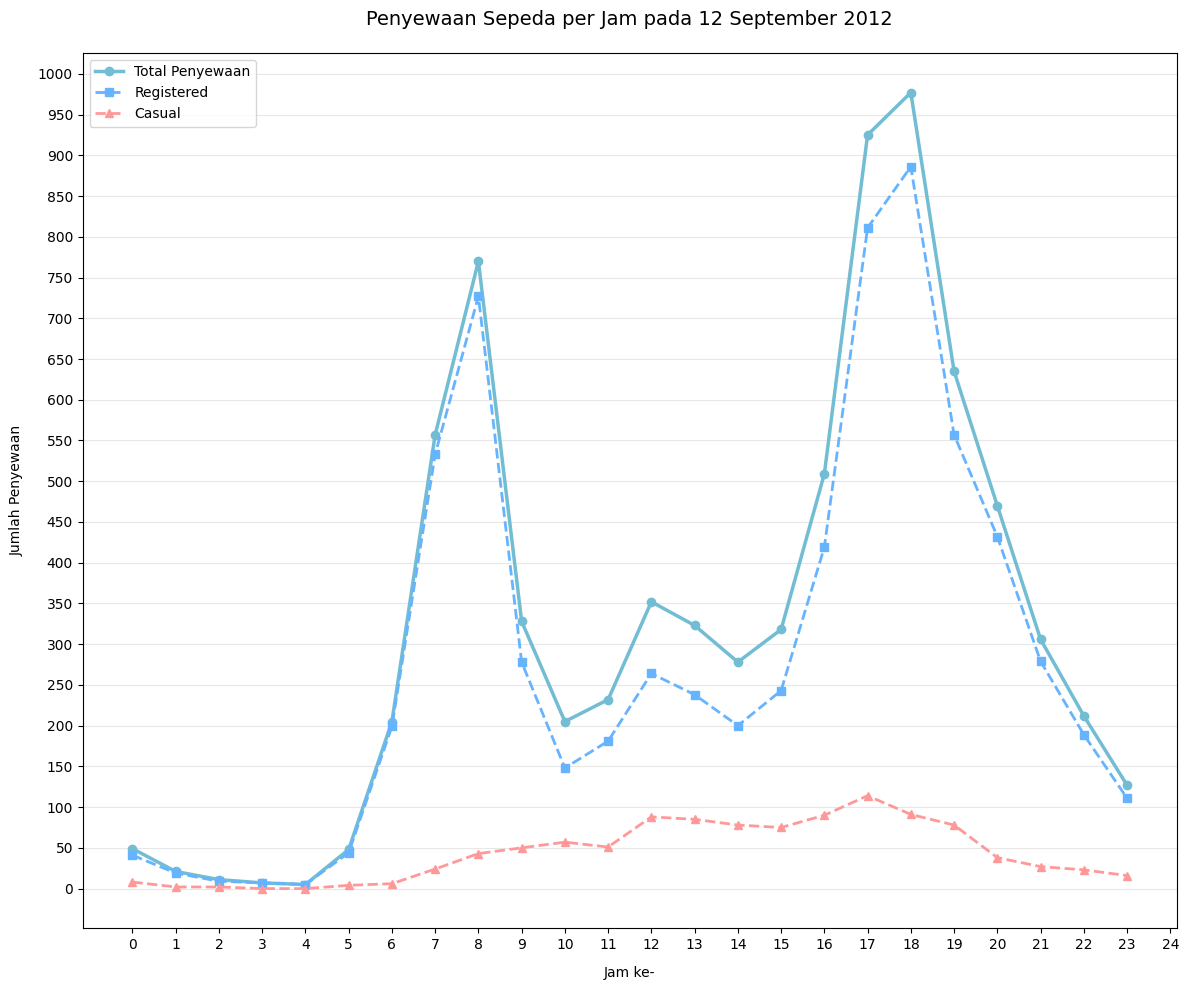

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor('white')

ax.plot(
      top_day_df["hr"], top_day_df["cnt"],
        label="Total Penyewaan", color="#72BCD4",
        marker="o", linewidth=2.5
  )

ax.plot(
        top_day_df["hr"], top_day_df["registered"],
        label="Registered", color="#66B3FF",
        linestyle="--", marker="s", linewidth=2
    )

ax.plot(
        top_day_df["hr"], top_day_df["casual"],
        label="Casual", color="#FF9999",
        linestyle="--", marker="^", linewidth=2
    )

ax.set_title(f"Penyewaan Sepeda per Jam pada {top_date.strftime('%d %B %Y')}", pad=20, fontsize=14)
ax.set_xlabel("Jam ke-", labelpad=10)
ax.set_ylabel("Jumlah Penyewaan", labelpad=10)
ax.set_xticks(range(0, 25))
ax.set_yticks(range(0, 1001, 50))
ax.grid(axis='y', alpha=0.3)
ax.legend(loc='upper left')

fig.tight_layout()
plt.show()

**Insight:**


- Penyewaan sepeda mencapai puncaknya pada jam 8 pagi dan 5-6 sore.

- Penyewaan cenderung rendah di tengah malam hingga subuh.

- Mulai meningkat di pagi hari, menurun pada siang hari, dan meningkat lagi pada sore hari.

### Pertanyaan 2:
### Bagaimana tren jumlah penyewaan sepeda dari dua tahun terakhir?


In [24]:
monthly_trend_df = day_df.resample(rule='ME', on='dteday').agg({
    "cnt": "sum"
})
monthly_trend_df.index = monthly_trend_df.index.strftime('%Y-%m')

monthly_trend_df = monthly_trend_df.reset_index()

monthly_trend_df.rename(columns={
    "dteday": "year_month",
    "cnt": "total_rentals"
}, inplace=True)
monthly_trend_df.head()


,year_month,total_rentals
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


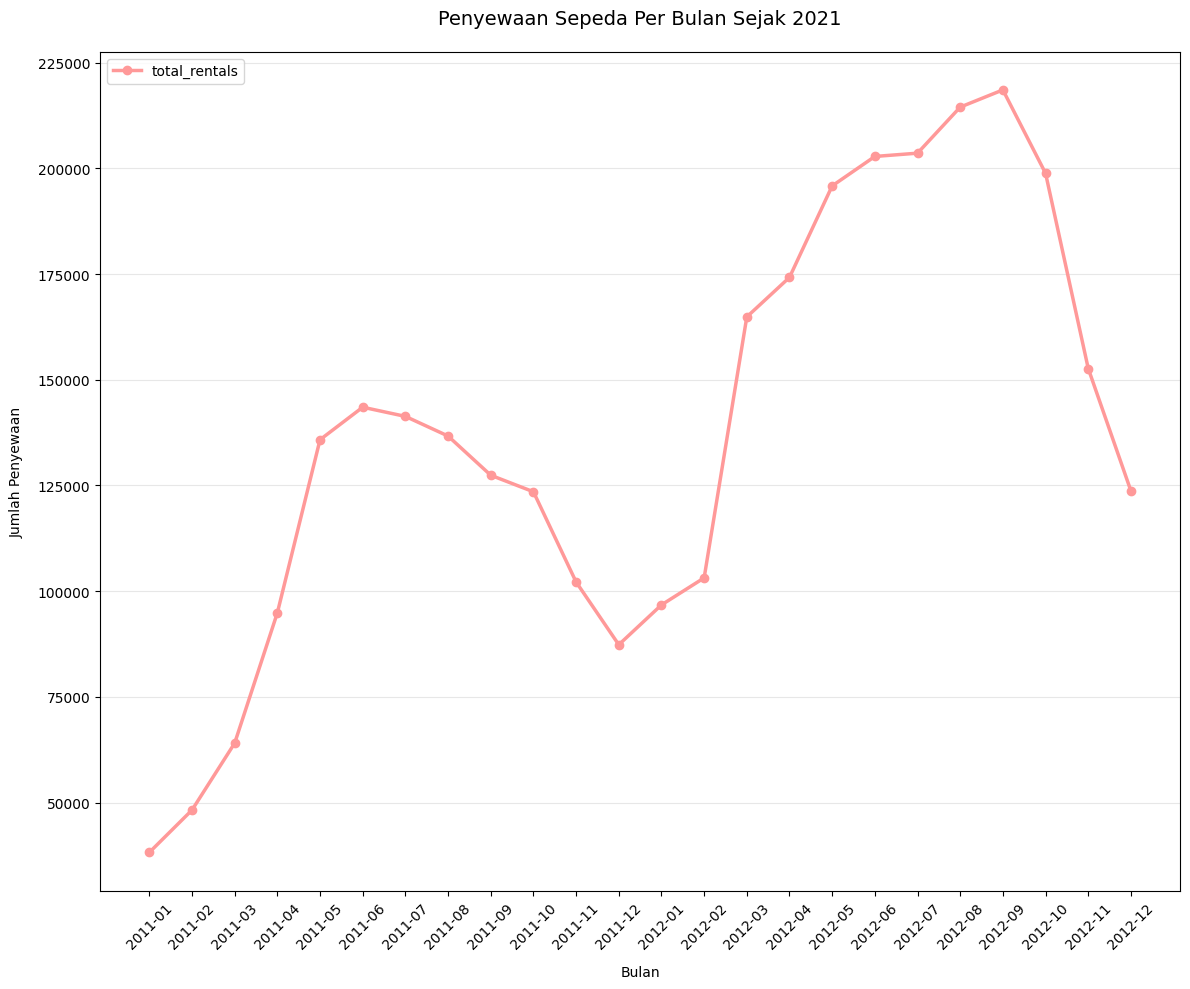

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor('white')

ax.plot(
      monthly_trend_df["year_month"], monthly_trend_df["total_rentals"],
      label="total_rentals",
      color="#FF9999",
      marker="o",
      linewidth=2.5
  )


ax.set_title(f"Penyewaan Sepeda Per Bulan Sejak 2021", pad=20, fontsize=14)
ax.set_xlabel("Bulan", labelpad=10)
ax.set_ylabel("Jumlah Penyewaan", labelpad=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Insight:**

- Penyewaan sepeda cenderung lebih tinggi pada musim panas dan menurun saat musim dingin.

- Puncak penyewaan terjadi pada bulan Juni hingga September, sementara penurunan terlihat pada Desember hingga Februari.



## Analisis Lanjutan (Opsional)

mengelompokkan jumlah penyewaan per hari ke dalam tiga kategori: **Rendah, Sedang, dan Tinggi**.  

Pertanyaan Lanjutan


In [26]:
day_df.to_csv("day_df.csv", index=False)

In [27]:
hour_df.to_csv("hour_df.csv", index=False)

In [28]:
max_cnt = day_df["cnt"].max()

if max_cnt <= 2500:
        bins = [0, max_cnt + 1]
        labels = ["Rendah"]
elif max_cnt <= 5000:
        bins = [0, 2500, max_cnt + 1]
        labels = ["Rendah", "Sedang"]
else:
      bins = [0, 2500, 5000, max_cnt + 1]
      labels = ["Rendah", "Sedang", "Tinggi"]



labels = ["Rendah", "Sedang", "Tinggi"]
day_df["rental_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels, include_lowest=True)

rental_counts = day_df["rental_category"].value_counts()
rental_counts = rental_counts.reindex(["Rendah", "Sedang", "Tinggi"], fill_value=0)

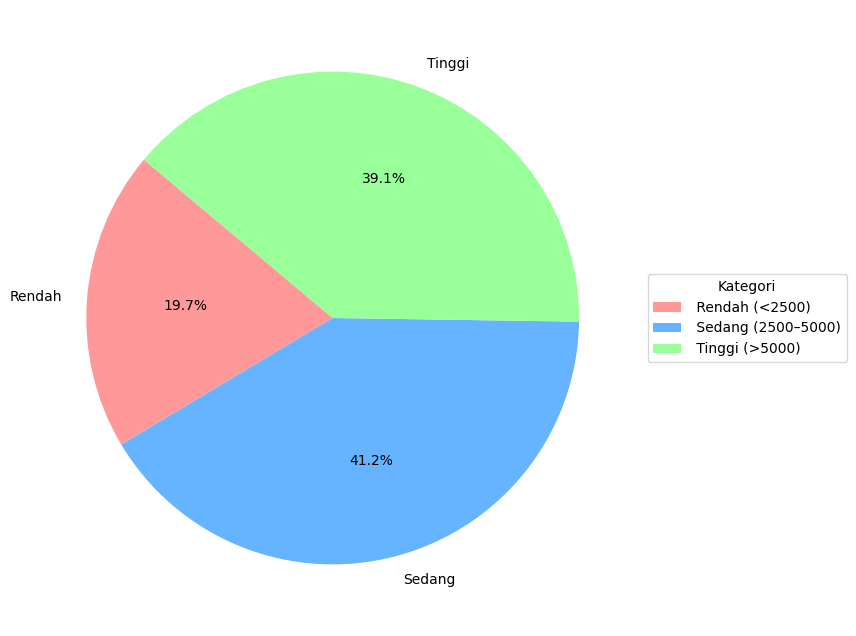

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(rental_counts, labels=rental_counts.index, autopct="%1.1f%%",
colors=["#ff9999", "#66b3ff", "#99ff99"], startangle=140)
legend_labels = [
    f" Rendah (<2500)",
    f" Sedang (2500–5000)",
    f" Tinggi (>5000)"
    ]
ax.legend(wedges, legend_labels, title="Kategori", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


- Mayoritas hari memiliki jumlah penyewaan dalam kategori "Sedang", menunjukkan bahwa sebagian besar hari memiliki jumlah penyewaan antara 2.500 hingga 5.000 unit.

- Hanya sebagian kecil hari masuk dalam kategori "Rendah", yang berarti hari-hari dengan kurang dari 2500 penyewaan jarang terjadi.

## Conclusion


1. **Tren Penyewaan Sepeda per Bulan**  
   Terlihat adanya pola musiman pada jumlah penyewaan sepeda. Jumlah penyewaan cenderung meningkat pada musim panas dan menurun pada musim dingin, yang mengindikasikan bahwa faktor cuaca dan musim sangat berpengaruh terhadap aktivitas pengguna.

2. **Tren Penyewaan Sepeda per Jam**  
   Hari dengan jumlah penyewaan tertinggi adalah **tanggal 3 Oktober 2012**.  
   Pada hari tersebut, penyewaan sepeda mencapai puncaknya pada **jam ke-18 (pukul 18.00)**, dengan dominasi pengguna terdaftar (registered).

3. **Distribusi Jumlah Penyewaan per Hari**  
   Berdasarkan pengelompokan jumlah penyewaan, sebagian besar hari berada dalam kategori sedang dan tinggi, yang berarti tingkat pemanfaatan sepeda cukup optimal dalam kebanyakan hari.

